In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from keras.models import Model
from sklearn.metrics import classification_report
from keras import layers, models, optimizers
import sklearn.metrics as metrics

D:\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
speech_data = pd.read_csv("speech-data-two-label.csv")

In [3]:
x_train, x_test, y_train, y_test = train_test_split(speech_data['VideoText'], speech_data['Category'], test_size=0.3, random_state=1)

In [4]:
# create a count vectorizer object 
cv = CountVectorizer(stop_words='english')
cv.fit(speech_data['VideoText'])

# transform the training and validation data using count vectorizer object
x_train_count =  cv.transform(x_train)
x_test_count =  cv.transform(x_test)

tfidf_tr = TfidfTransformer()
x_train_count_tfidf = tfidf_tr.fit_transform(x_train_count)
x_test_count_tfidf = tfidf_tr.transform(x_test_count)

In [5]:
# ngram level tf-idf 
tv_ngram = TfidfVectorizer(ngram_range=(1,2))
tv_ngram.fit(speech_data['VideoText'])
x_train_tfidf_ngram =  tv_ngram.transform(x_train)
x_test_tfidf_ngram =  tv_ngram.transform(x_test)



Accuracy :  0.8571428571428571


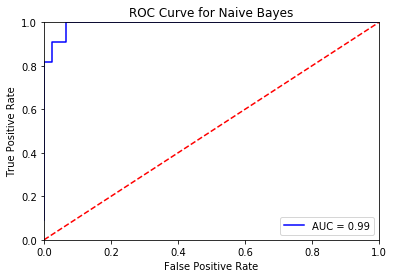

In [6]:
mlnb = MultinomialNB()
mlnb.fit(x_train_count_tfidf, y_train)
predictions = mlnb.predict(x_test_count_tfidf)
print("\nAccuracy : ", accuracy_score(predictions, y_test))

probs = mlnb.predict_proba(x_test_count_tfidf)
preds = probs[:,1]
fpr_nb, tpr_nb, threshold_nb = metrics.roc_curve(y_test, preds)
roc_auc_nb = metrics.auc(fpr_nb, tpr_nb)

    # method I: plt
import matplotlib.pyplot as plt
plt.title('ROC Curve for Naive Bayes')
plt.plot(fpr_nb, tpr_nb, 'b', label = 'AUC = %0.2f' % roc_auc_nb)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


Accuracy :  0.9464285714285714


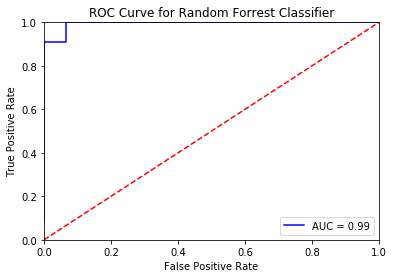

In [7]:
rf = RandomForestClassifier(random_state=40,n_estimators=1024)
rf.fit(x_train_count_tfidf, y_train)
predictions = rf.predict(x_test_count_tfidf)
print("\nAccuracy : ", accuracy_score(predictions, y_test))

probs = rf.predict_proba(x_test_count_tfidf)
preds = probs[:,1]
fpr_rf, tpr_rf, threshold_rf = metrics.roc_curve(y_test, preds)
roc_auc_rf = metrics.auc(fpr_rf, tpr_rf)

    # method I: plt
import matplotlib.pyplot as plt
plt.title('ROC Curve for Random Forrest Classifier')
plt.plot(fpr_rf, tpr_rf, 'b', label = 'AUC = %0.2f' % roc_auc_rf)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()



Accuracy :  0.9107142857142857


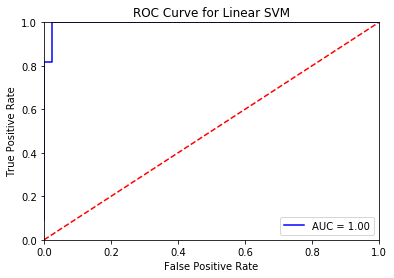

In [8]:
svm = SVC(kernel = 'linear', probability=True)
svm.fit(x_train_count_tfidf, y_train)
predictions = svm.predict(x_test_count_tfidf)
print("\nAccuracy : ", accuracy_score(predictions, y_test))

probs = svm.predict_proba(x_test_count_tfidf)
preds = probs[:,1]
fpr_svm, tpr_svm, threshold_svm = metrics.roc_curve(y_test, preds)
roc_auc_svm = metrics.auc(fpr_svm, tpr_svm)

    # method I: plt
import matplotlib.pyplot as plt
plt.title('ROC Curve for Linear SVM')
plt.plot(fpr_svm, tpr_svm, 'b', label = 'AUC = %0.2f' % roc_auc_svm)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


Epoch 1/10
128/128 [==============================] - 8s 62ms/sample - loss: 0.6893 - acc: 0.5859
Epoch 2/10
128/128 [==============================] - 6s 49ms/sample - loss: 0.6757 - acc: 0.7109
Epoch 3/10
128/128 [==============================] - 6s 46ms/sample - loss: 0.6619 - acc: 0.7109
Epoch 4/10
128/128 [==============================] - 6s 46ms/sample - loss: 0.6460 - acc: 0.7109
Epoch 5/10
128/128 [==============================] - 6s 47ms/sample - loss: 0.6308 - acc: 0.7109
Epoch 6/10
128/128 [==============================] - 6s 46ms/sample - loss: 0.6148 - acc: 0.7109
Epoch 7/10
128/128 [==============================] - 6s 47ms/sample - loss: 0.6031 - acc: 0.7109
Epoch 8/10
128/128 [==============================] - 6s 46ms/sample - loss: 0.6071 - acc: 0.7109
Epoch 9/10
128/128 [==============================] - 6s 46ms/sample - loss: 0.6036 - acc: 0.7109
Epoch 10/10
56/56 [==============================] - 1s 13ms/sample - loss: 0.5129 - acc: 0.8036

Accuracy :  0.803571

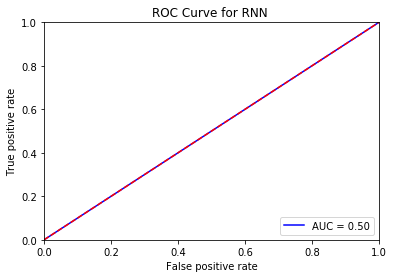

In [17]:
def rnnModel(Xtrain, Ytrain, Xtest):
    model = tf.keras.Sequential([
        tf.keras.layers.Embedding(1000, 64),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(10)),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

    model.fit(Xtrain, Ytrain, batch_size=30, epochs=10)
    
    test_loss, test_acc = model.evaluate(Xtest, y_test)
    print("\nAccuracy : ",test_acc)
    
    predictions = model.predict(Xtest).ravel()
    
    #for roc-curve
    fpr_keras, tpr_keras, thresholds_keras = metrics.roc_curve(y_test, predictions)
    auc_keras = metrics.auc(fpr_keras, tpr_keras)
    
    plt.figure(1)
    plt.plot(fpr_keras, tpr_keras, 'b', label = 'AUC = %0.2f' % auc_keras)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC Curve for RNN ')
    plt.show()
    
rnnModel(x_train_count_tfidf, y_train, x_test_count_tfidf)

### Using Word Counts Feature Set


Accuracy :  0.8571428571428571


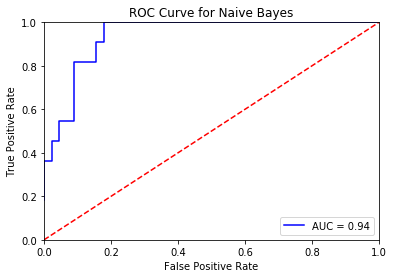

In [13]:
mlnb = MultinomialNB()
mlnb.fit(x_train_count, y_train)
predictions = mlnb.predict(x_test_count)
print("\nAccuracy : ", accuracy_score(predictions, y_test))

probs = mlnb.predict_proba(x_test_count)
preds = probs[:,1]
fpr_nb, tpr_nb, threshold_nb = metrics.roc_curve(y_test, preds)
roc_auc_nb = metrics.auc(fpr_nb, tpr_nb)

    # method I: plt
import matplotlib.pyplot as plt
plt.title('ROC Curve for Naive Bayes')
plt.plot(fpr_nb, tpr_nb, 'b', label = 'AUC = %0.2f' % roc_auc_nb)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


Accuracy :  0.9642857142857143


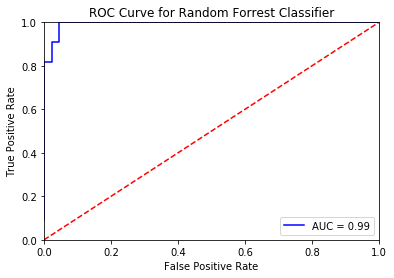

In [14]:
rf = RandomForestClassifier(random_state=40,n_estimators=1024)
rf.fit(x_train_count, y_train)
predictions = rf.predict(x_test_count)
print("\nAccuracy : ", accuracy_score(predictions, y_test))

probs = rf.predict_proba(x_test_count)
preds = probs[:,1]
fpr_rf, tpr_rf, threshold_rf = metrics.roc_curve(y_test, preds)
roc_auc_rf = metrics.auc(fpr_rf, tpr_rf)

    # method I: plt
import matplotlib.pyplot as plt
plt.title('ROC Curve for Random Forrest Classifier')
plt.plot(fpr_rf, tpr_rf, 'b', label = 'AUC = %0.2f' % roc_auc_rf)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


Accuracy :  0.8392857142857143


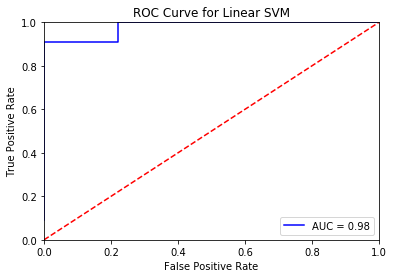

In [15]:
svm = SVC(kernel = 'linear', probability=True)
svm.fit(x_train_count, y_train)
predictions = svm.predict(x_test_count)
print("\nAccuracy : ", accuracy_score(predictions, y_test))

probs = svm.predict_proba(x_test_count)
preds = probs[:,1]
fpr_svm, tpr_svm, threshold_svm = metrics.roc_curve(y_test, preds)
roc_auc_svm = metrics.auc(fpr_svm, tpr_svm)

    # method I: plt
import matplotlib.pyplot as plt
plt.title('ROC Curve for Linear SVM')
plt.plot(fpr_svm, tpr_svm, 'b', label = 'AUC = %0.2f' % roc_auc_svm)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


Epoch 1/10
128/128 [==============================] - 8s 59ms/sample - loss: 0.6883 - acc: 0.6094
Epoch 2/10
128/128 [==============================] - 6s 49ms/sample - loss: 0.6725 - acc: 0.7109
Epoch 3/10
128/128 [==============================] - 6s 50ms/sample - loss: 0.6590 - acc: 0.7109
Epoch 4/10
128/128 [==============================] - 7s 51ms/sample - loss: 0.6432 - acc: 0.7109
Epoch 5/10
128/128 [==============================] - 6s 50ms/sample - loss: 0.6254 - acc: 0.7109
Epoch 6/10
128/128 [==============================] - 6s 50ms/sample - loss: 0.6145 - acc: 0.7109
Epoch 7/10
128/128 [==============================] - 7s 52ms/sample - loss: 0.6060 - acc: 0.7109
Epoch 8/10
128/128 [==============================] - 6s 50ms/sample - loss: 0.6031 - acc: 0.7109
Epoch 9/10
128/128 [==============================] - 6s 47ms/sample - loss: 0.6021 - acc: 0.7109
Epoch 10/10
56/56 [==============================] - 1s 14ms/sample - loss: 0.5181 - acc: 0.8036

Accuracy :  0.803571

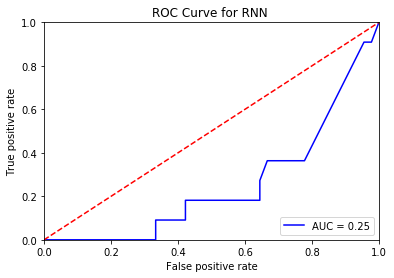

In [18]:
rnnModel(x_train_count, y_train, x_test_count)